# Human bone marrow (ATAC-seq + protein)

In this tutorial we will guide you through data preprocessing and multimodal analysis of human bone marrow data using Ocelli.

Data comes from [Mimitou, Eleni P., et al. "Scalable, multimodal profiling of chromatin accessibility, gene expression and protein levels in single cells." Nature biotechnology 39.10 (2021): 1246-1258.](https://www.nature.com/articles/s41587-021-00927-2) and consists of two single-cell ASAP-seq modalities: ATAC-seq (chromatin accessibility) and few protein. All analyses are performed on prefiltered data published by the authors on [GitHub](https://github.com/caleblareau/asap_reproducibility/tree/master/bonemarow_asapseq/output/for_total_vi_asap_marrow/filtered_feature_bc_matrix).

## Load the data

After downloading the data, the steps required for its loading hugely depend on its format. In this case, the count matrix is stored using mtx format, which you can load as an AnnData object using scanpy. scanpy supports [multiple input data files](https://scanpy.readthedocs.io/en/stable/api.html#reading) for reading.

Next, transpose the count matrix so rows and columns correspond to cells and features. Ocelli strictly requires this count matrix structure. Then, annotate cells (in ``adata.obs``) using ``barcodes.tsv`` and variable features (in ``adata.var``) using ``features.tsv`` files.

In [1]:
import scanpy as sc
from os.path import join
import pandas as pd

# a path to the folder with data
folder_path = '../../../../data/human-bone-marrow'

adata = sc.read_mtx(join(folder_path, 'matrix.mtx'))

adata = adata.transpose()

df_obs = pd.read_csv(join(folder_path, 'barcodes.tsv'), sep='\t', header=None, index_col=0, names=['barcode'])
df_var = pd.read_csv(join(folder_path, 'features.tsv'), sep='\t', header=None, index_col=1, names=['gene', 'modality'])[['modality']]

adata.obs = df_obs
adata.obs_names_make_unique()

adata.var = df_var
adata.var_names_make_unique()

adata

AnnData object with n_obs × n_vars = 10927 × 3238
    var: 'modality'

In [2]:
adata.obs

""
barcode
AAACGAAAGCGTATCT-1
AAACGAAAGCGTTGCC-1
AAACGAAAGGATTGAT-1
AAACGAAAGGCGTCCT-1
AAACGAAAGTCGTGAG-1
...
TTTGTGTGTTCCATCC-1
TTTGTGTGTTGGCGAA-1
TTTGTGTTCACGTGTA-1


In [3]:
adata.var

,modality
GNB1,Gene Expression
PRKCZ,Gene Expression
SKI,Gene Expression
C1orf174,Gene Expression
KCNAB2,Gene Expression
...,...
CD151,Antibody Capture
CD183,Antibody Capture
CD37,Antibody Capture
CD33,Antibody Capture


The dataset consists of 10,927 cells and 3,238 features, which belong to two modalities specified in ``adata.var['modality']``. Modalities are usually stored in separate files, but we need to split features manually in this case.

Each modality's count matrix comes from a different distribution, and you should preprocess them individually. We recommend creating a separate AnnData object for each modality in preprocessing steps.

ATAC-seq count matrix has 3000 preselected regions.

In [4]:
chromatin = adata[:, adata.var['modality'] == 'Gene Expression']
chromatin

View of AnnData object with n_obs × n_vars = 10927 × 3000
    var: 'modality'

Protein count matrix has 238 proteins.

In [5]:
protein = adata[:, adata.var['modality'] == 'Antibody Capture']
protein

View of AnnData object with n_obs × n_vars = 10927 × 238
    var: 'modality'

## Topic modeling

Topic modeling is a crucial step of Ocelli data preprocessing. Latent Dirichlet Allocation is a generative probabilistic topic model which groups features into cohesive groups (topics). One of its outputs is a probability distribution of how probable it is that a cell belongs to a specific topic based on its features. These latent representations are highly-compressed and information-rich data embeddings on which we train models.

Topic modeling should be run on raw, unnormalized count matrices. However, feel free to filter out low-quality cells/features beforehand. In this case, data is preprepared by the authors, so you can leave it as it is.

Import Ocelli, set a seed for reproducible results and calculate ATAC-seq topics. At this stage, it is important to specify two LDA parameters. ``n_components`` is the number of topics and ``max_iter`` is the maximum number of LDA's training iterations. We found LDA to perform well with ``max_iter``'s value within 30-50 range.

In [6]:
import ocelli as oci

SEED = 17

oci.pp.LDA(chromatin, n_components=15, verbose=1, max_iter=50, random_state=SEED)

iteration: 1 of max_iter: 50
iteration: 2 of max_iter: 50
iteration: 3 of max_iter: 50
iteration: 4 of max_iter: 50
iteration: 5 of max_iter: 50
iteration: 6 of max_iter: 50
iteration: 7 of max_iter: 50
iteration: 8 of max_iter: 50
iteration: 9 of max_iter: 50
iteration: 10 of max_iter: 50
iteration: 11 of max_iter: 50
iteration: 12 of max_iter: 50
iteration: 13 of max_iter: 50
iteration: 14 of max_iter: 50
iteration: 15 of max_iter: 50
iteration: 16 of max_iter: 50
iteration: 17 of max_iter: 50
iteration: 18 of max_iter: 50
iteration: 19 of max_iter: 50
iteration: 20 of max_iter: 50
iteration: 21 of max_iter: 50
iteration: 22 of max_iter: 50
iteration: 23 of max_iter: 50
iteration: 24 of max_iter: 50
iteration: 25 of max_iter: 50
iteration: 26 of max_iter: 50
iteration: 27 of max_iter: 50
iteration: 28 of max_iter: 50
iteration: 29 of max_iter: 50
iteration: 30 of max_iter: 50
iteration: 31 of max_iter: 50
iteration: 32 of max_iter: 50
iteration: 33 of max_iter: 50
iteration: 34 of ma

Cell-topic distributions are saved in ``adata.obsm['lda']`` in an array of shape ``(n_obs, n_topics)``. Also, variational parameters for feature-topic distribution are saved in ``adata.varm['lda']`` in an array of shape ``(n_var, n_topics)``.

In [7]:
chromatin

AnnData object with n_obs × n_vars = 10927 × 3000
    var: 'modality'
    uns: 'lda_params'
    obsm: 'lda'
    varm: 'lda'

Similarly, calculate topics for protein levels.

In [8]:
oci.pp.LDA(protein, n_components=15, verbose=1, max_iter=50, random_state=SEED)

iteration: 1 of max_iter: 50
iteration: 2 of max_iter: 50
iteration: 3 of max_iter: 50
iteration: 4 of max_iter: 50
iteration: 5 of max_iter: 50
iteration: 6 of max_iter: 50
iteration: 7 of max_iter: 50
iteration: 8 of max_iter: 50
iteration: 9 of max_iter: 50
iteration: 10 of max_iter: 50
iteration: 11 of max_iter: 50
iteration: 12 of max_iter: 50
iteration: 13 of max_iter: 50
iteration: 14 of max_iter: 50
iteration: 15 of max_iter: 50
iteration: 16 of max_iter: 50
iteration: 17 of max_iter: 50
iteration: 18 of max_iter: 50
iteration: 19 of max_iter: 50
iteration: 20 of max_iter: 50
iteration: 21 of max_iter: 50
iteration: 22 of max_iter: 50
iteration: 23 of max_iter: 50
iteration: 24 of max_iter: 50
iteration: 25 of max_iter: 50
iteration: 26 of max_iter: 50
iteration: 27 of max_iter: 50
iteration: 28 of max_iter: 50
iteration: 29 of max_iter: 50
iteration: 30 of max_iter: 50
iteration: 31 of max_iter: 50
iteration: 32 of max_iter: 50
iteration: 33 of max_iter: 50
iteration: 34 of ma

LDA's cell-topic distributions need no further normalization, as they are cell-normalized by design (topic probabilities sum to 1 for each cell).

In [9]:
chromatin.obsm['lda'].sum(axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

In [10]:
protein.obsm['lda'].sum(axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

As a result, both modalities are preprocessed. To prepare them for MDM training, you need to:

- create a new AnnData object ``adata`` with as many rows as there are cells*, a number of columns can be any positive number,
- save cell metadata to ``adata.obs``,
- save preprocessed modality matrices to ``adata.obsm``,
- save a list of modality ``adata.obsm`` keys to ``adata.uns['modalities']``.

*To achieve it quickly, initialize AnnData with an empty ``scipy.sparse.csr_matrix`` - see the example below.

In [11]:
import numpy as np
from scipy.sparse import csr_matrix
import anndata

n_cells = adata.shape[0]

# csr_matrix takes matrix shape as an input
dummy_csr = csr_matrix((n_cells, 1))

adata = anndata.AnnData(dummy_csr)

adata.obs = df_obs

adata.obsm['chromatin'] = chromatin.obsm['lda']
adata.obsm['protein'] = protein.obsm['lda']

adata.uns['modalities'] = ['chromatin', 'protein']

adata

AnnData object with n_obs × n_vars = 10927 × 1
    uns: 'modalities'
    obsm: 'chromatin', 'protein'

## Multimodal Diffusion Maps

To find the multimodal representation of the HBM dataset, repeat the three-stage process from the **Getting Started** tutorial: find nearest neighbors from each modality separately, calculate multimodal weights, and compute the MDM embedding.

In [12]:
oci.pp.neighbors(adata, n_neighbors=50, verbose=True)
oci.tl.weights(adata, random_state=SEED, verbose=True)
oci.tl.MDM(adata, n_components=10, random_state=SEED, verbose=True)

[chromatin]	50 nearest neighbors calculated.
[protein]	50 nearest neighbors calculated.


2022-11-08 18:13:06,872	INFO worker.py:1518 -- Started a local Ray instance.


Multimodal cell-specific weights estimated.


2022-11-08 18:13:13,588	INFO worker.py:1518 -- Started a local Ray instance.


[chromatin]	Unimodal Markov chain calculated.
[protein]	Unimodal Markov chain calculated.
Multimodal Markov chain calculated.
Eigendecomposition finished.
10 Multimodal Diffusion Maps components calculated.


In this dataset, ten components are sufficient to capture the global structure.

In [13]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

Ocelli methods include wrappers for two tools suitable for further dimension reduction to 2 or 3 dimensions that can be visualized: ForceAtlas2 and UMAP. ForceAtlas2 is very potent for well-connected datasets with complex substructures ([Wolf, F. A., 2019](https://link.springer.com/article/10.1186/s13059-019-1663-x), [Wagner, D. E., 2018](https://www.science.org/doi/abs/10.1126/science.aar4362), [Schiebinger, G., 2019](https://www.sciencedirect.com/science/article/pii/S009286741930039X)). UMAP works better for data with separated clusters ([Becht, E., 2018](https://www.nature.com/articles/nbt.4314)). Here, we recommend UMAP.

(<Figure size 1920x1440 with 1 Axes>, <AxesSubplot:>)

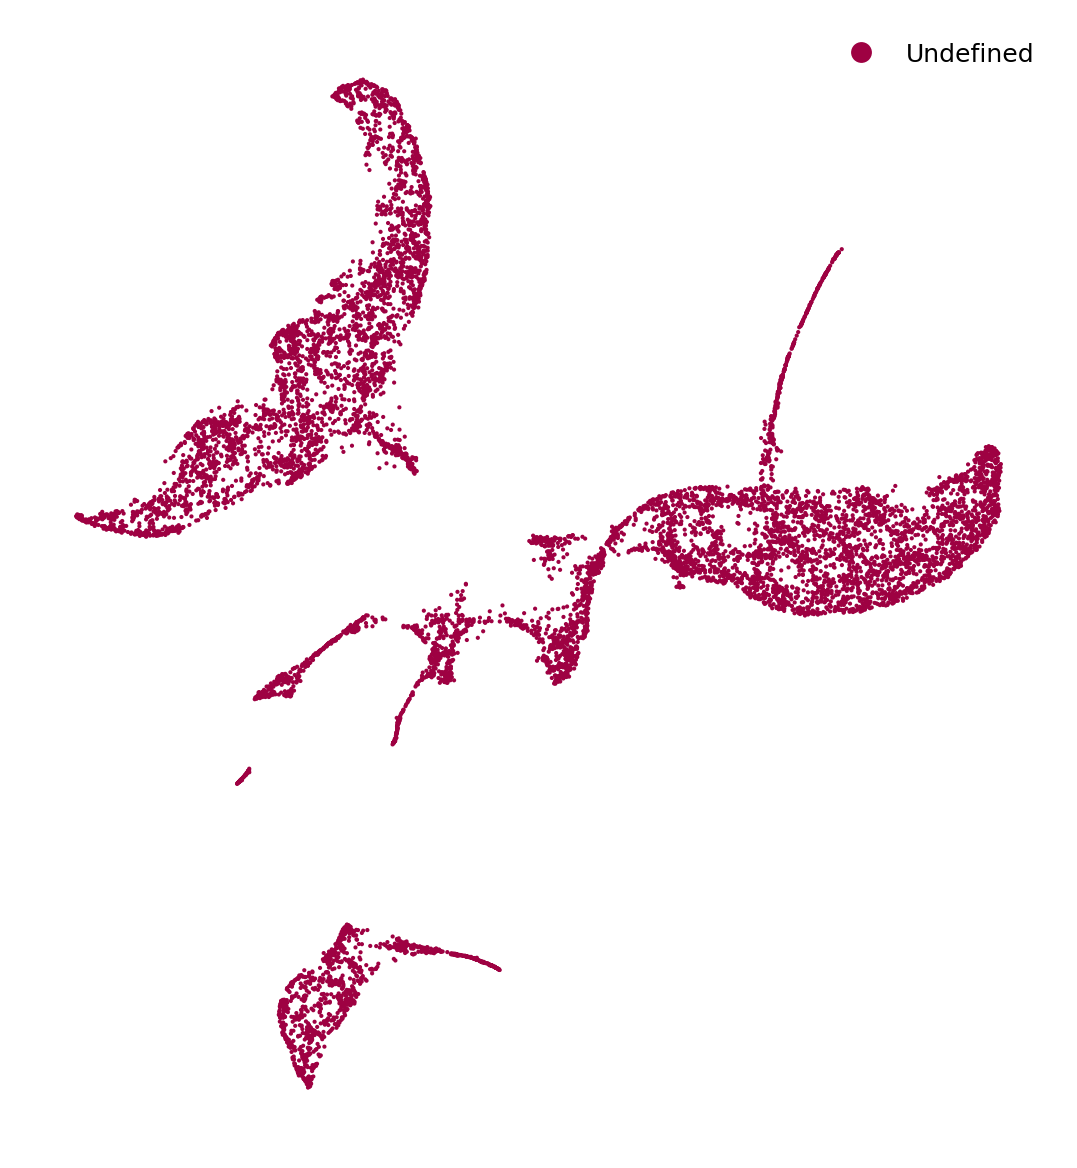

In [14]:
oci.tl.UMAP(adata, obsm_key='X_mdm', n_neighbors=100, min_dist=0.1, random_state=SEED)
oci.pl.scatter(adata, x_key='X_umap', marker_size=1)

You can easily change scatter plot colors (using ``Matplotlib`` colormap objects or [predefined colormap names](https://matplotlib.org/stable/tutorials/colors/colormaps.html)) and color schemes (using ``adata.obs`` of adata.obsm keys).

Below, a new colormap is defined using ``matplotlib.colors``. You can use it to visualize weight distributions for each modality.

(<Figure size 1920x1440 with 4 Axes>,
 array([<AxesSubplot:title={'center':'chromatin'}>,
        <AxesSubplot:title={'center':'protein'}>], dtype=object))

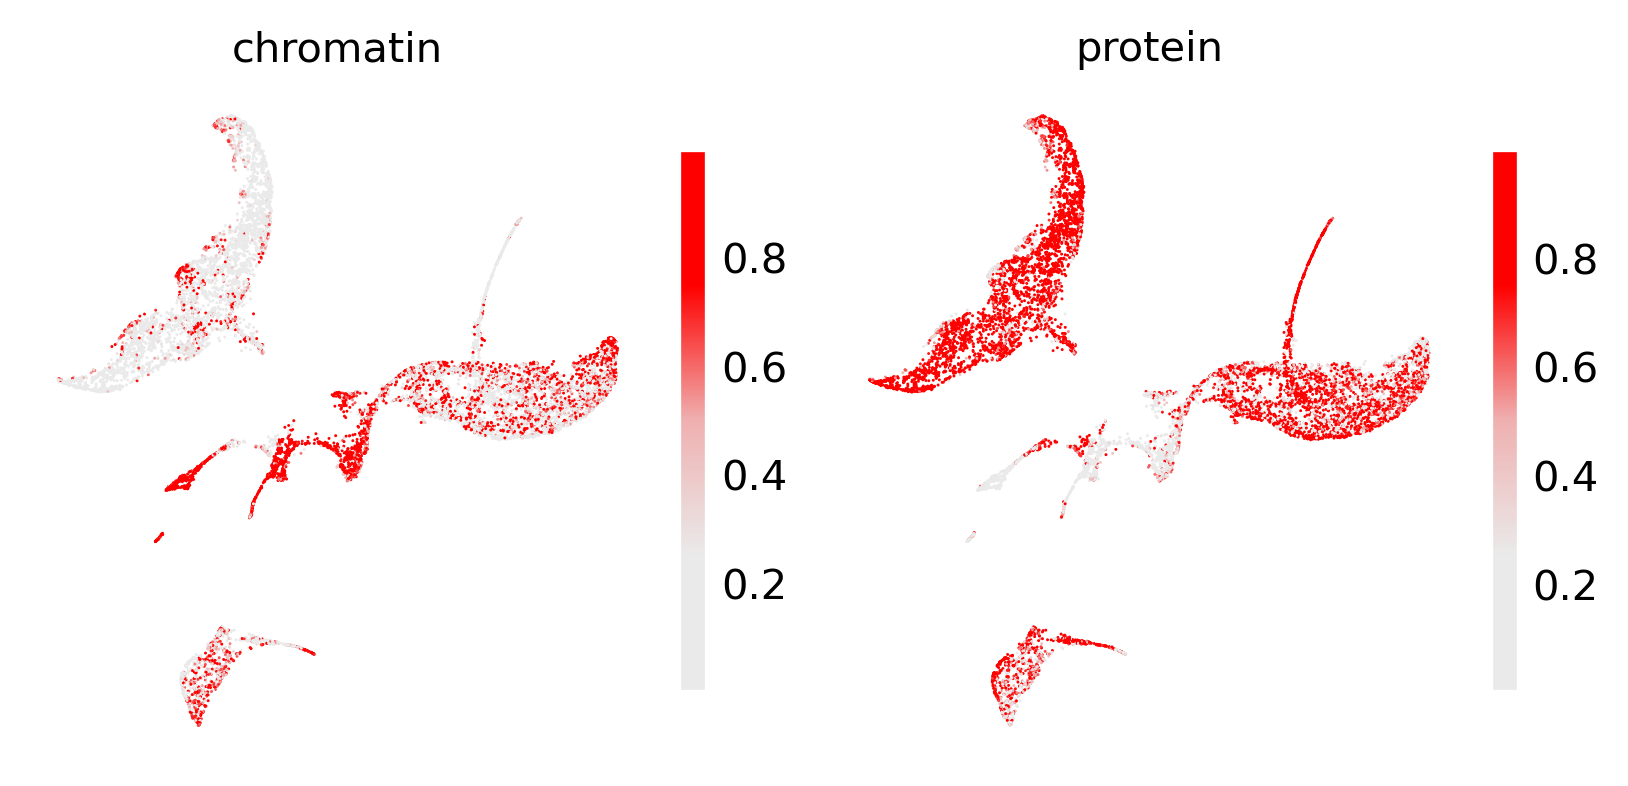

In [15]:
cmap = mpl.colors.LinearSegmentedColormap.from_list('custom', ['#EAEAEA', '#EAEAEA', '#EFB0B0', '#FF0000', '#FF0000'], N=256)

oci.pl.scatter(adata, x_key='X_umap', color_key='weights', cmap=cmap, marker_size=0.5, fontsize=10)

The embedding shows three major clusters, which you can identify by analyzing marker activity. Markers are single genes/proteins, that are specific to certain cell types. Below, you can see how to analyze marker activity using Ocelli.

## Marker analysis of protein levels

We evaluate marker activity using the expression level. Firstly, normalize the protein level count matrix.

In [16]:
sc.pp.normalize_total(protein, target_sum=10000)

### Monocytes

CD14 is a protein marker expressed in monocytes.

Save CD14's normalized expression from the count matrix to `adata.obs` and plot UMAP's embedding.

(<Figure size 1920x1440 with 2 Axes>, <AxesSubplot:title={'center':'CD14'}>)

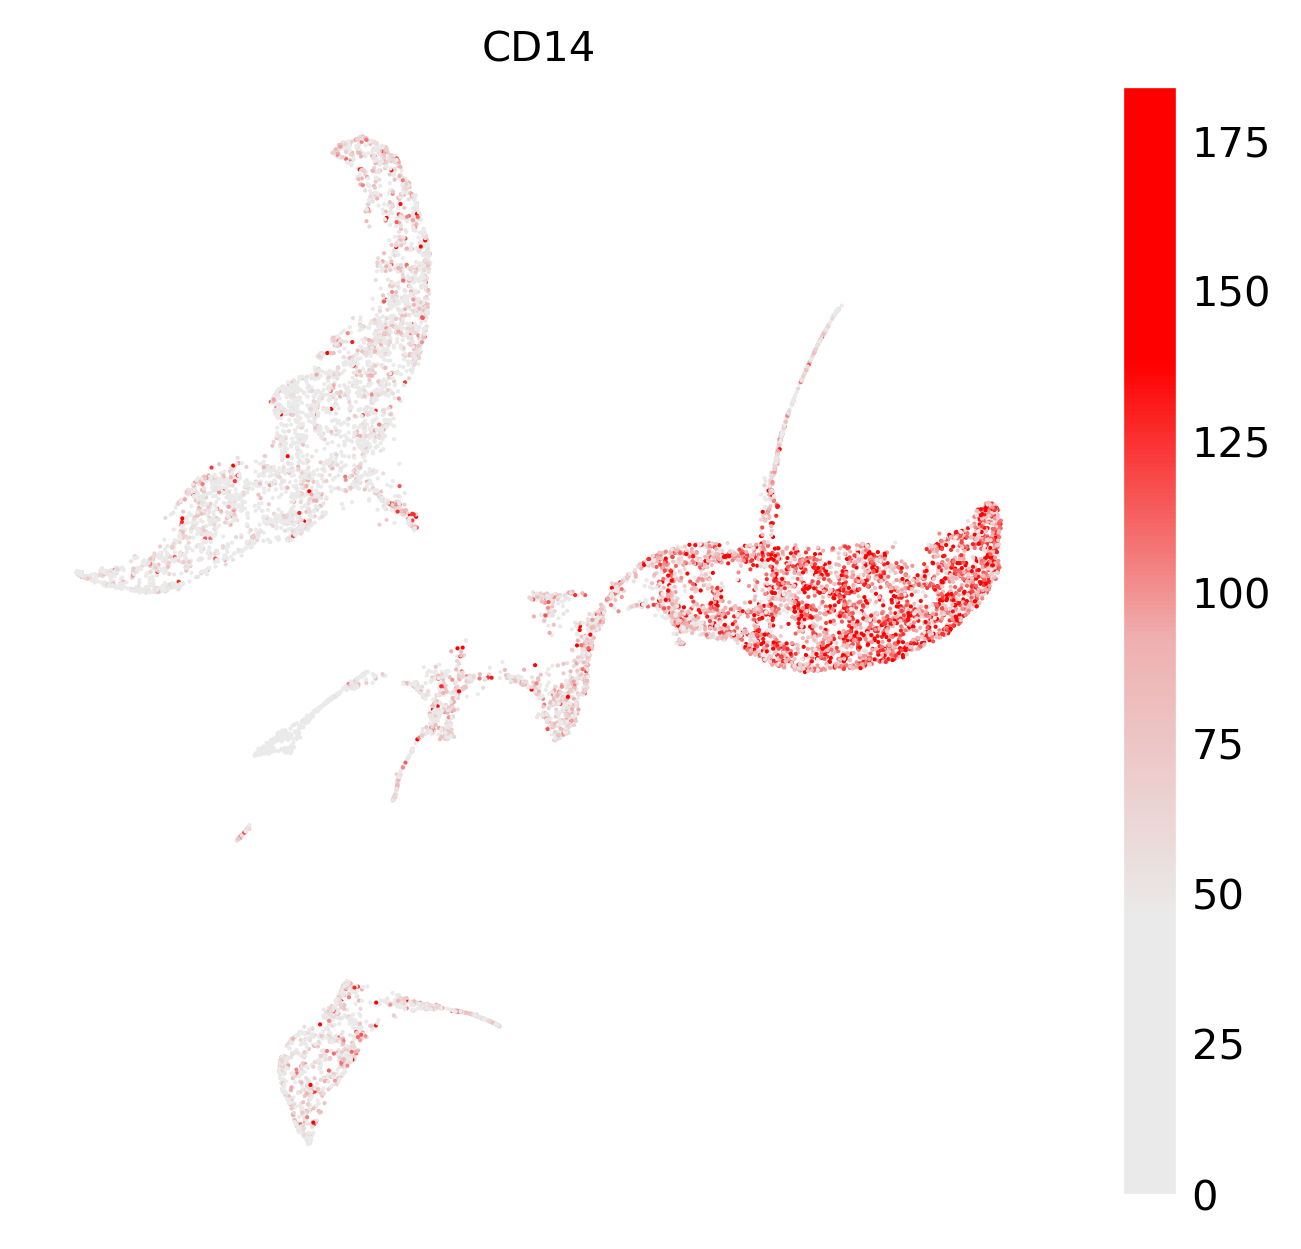

In [17]:
adata.obs['CD14'] = protein[:, 'CD14'].X.toarray()
oci.pl.scatter(adata, x_key='X_umap', color_key='CD14', cmap=cmap, marker_size=1, fontsize=10)

### Progenitors, erythroid cells

CD71 is a protein marker expressed in progenitors and erythroid cells.

(<Figure size 1920x1440 with 2 Axes>, <AxesSubplot:title={'center':'CD71'}>)

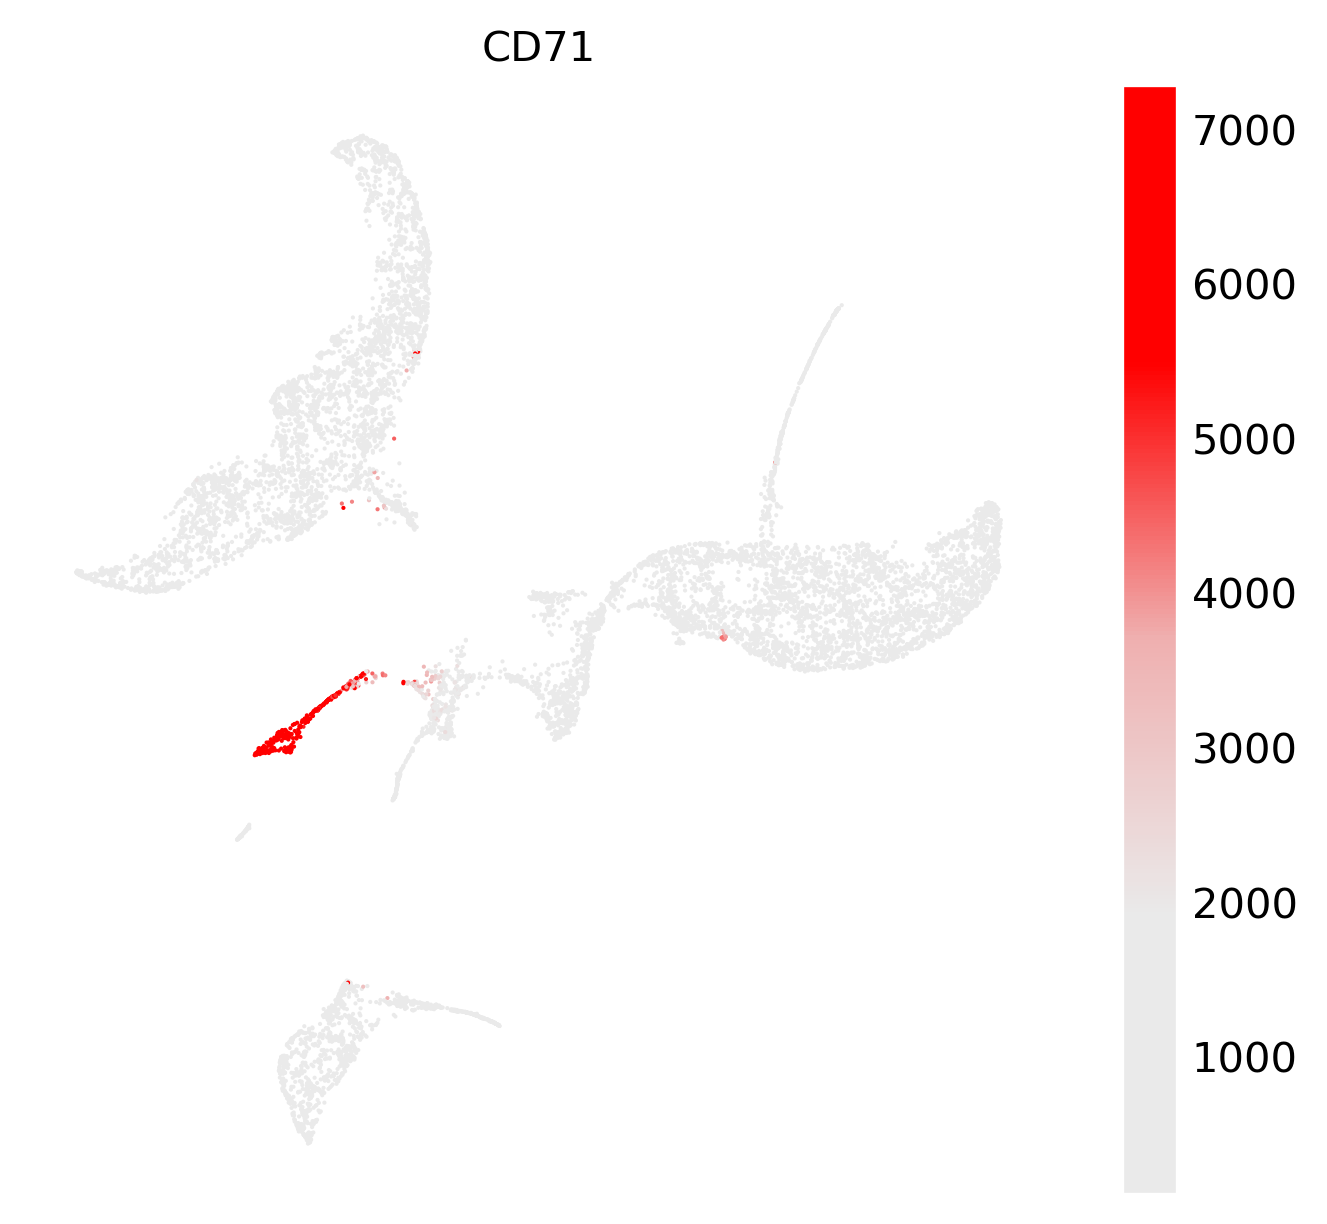

In [18]:
adata.obs['CD71'] = protein[:, 'CD71'].X.toarray()
oci.pl.scatter(adata, x_key='X_umap', color_key='CD71', cmap=cmap, marker_size=1, fontsize=10)

CD34 is a protein marker expressed in progenitors.

(<Figure size 1920x1440 with 2 Axes>, <AxesSubplot:title={'center':'CD34'}>)

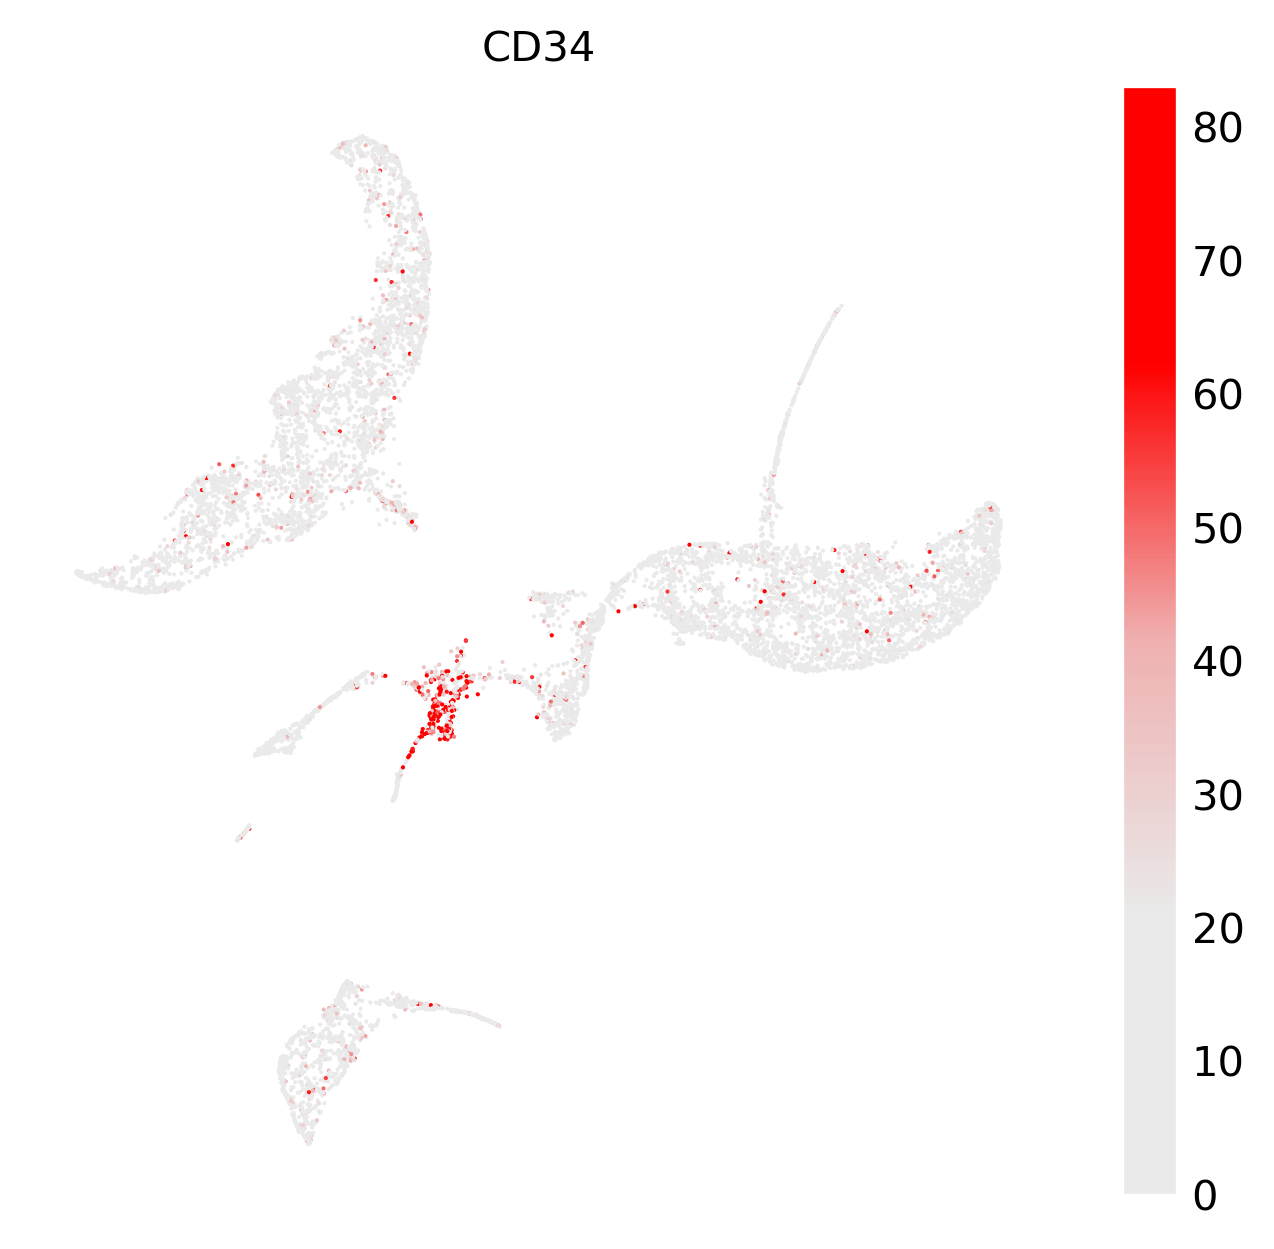

In [19]:
adata.obs['CD34'] = protein[:, 'CD34'].X.toarray()
oci.pl.scatter(adata, x_key='X_umap', color_key='CD34', cmap=cmap, marker_size=1, fontsize=10)

### B cells

CD19 is a protein marker expressed in B cells.

(<Figure size 1920x1440 with 2 Axes>, <AxesSubplot:title={'center':'CD19'}>)

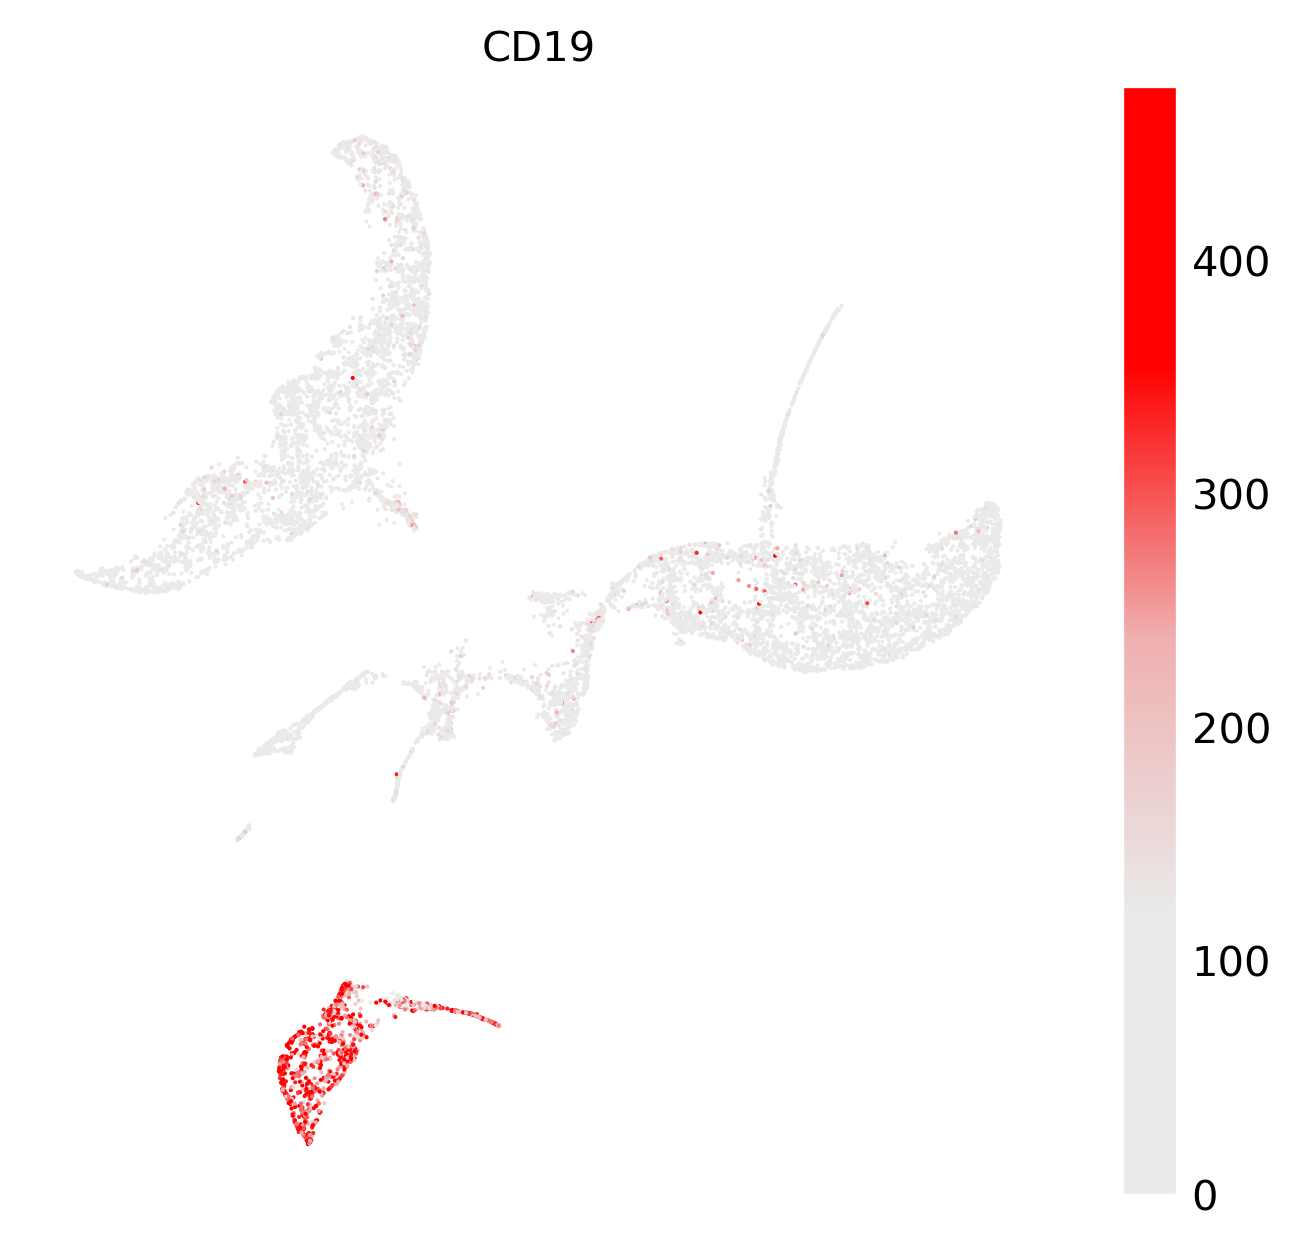

In [20]:
adata.obs['CD19'] = protein[:, 'CD19'].X.toarray()
oci.pl.scatter(adata, x_key='X_umap', color_key='CD19', cmap=cmap, marker_size=1, fontsize=10)

### T cells

There two major subtypes of T cells: CD4+ and CD8+ T cells. These are named for the presence of the cell surface proteins CD4 or CD8.

(<Figure size 1920x1440 with 2 Axes>, <AxesSubplot:title={'center':'CD4-1'}>)

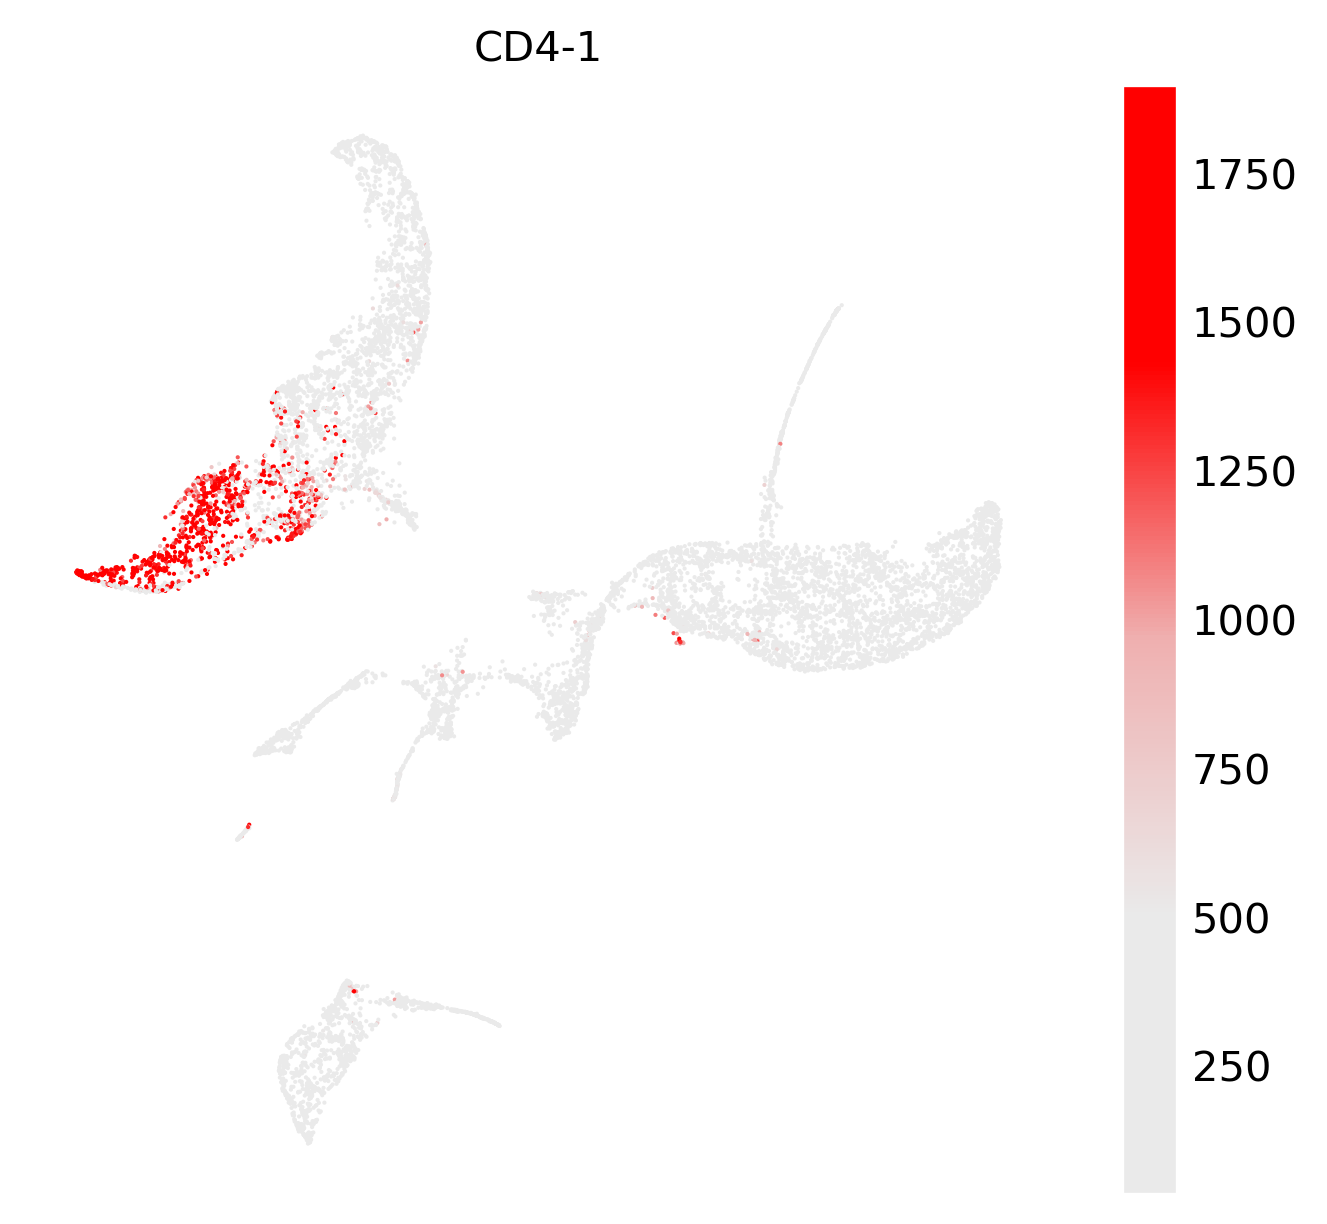

In [21]:
adata.obs['CD4-1'] = protein[:, 'CD4-1'].X.toarray()
oci.pl.scatter(adata, x_key='X_umap', color_key='CD4-1', cmap=cmap, marker_size=1, fontsize=10)

(<Figure size 1920x1440 with 2 Axes>, <AxesSubplot:title={'center':'CD8a'}>)

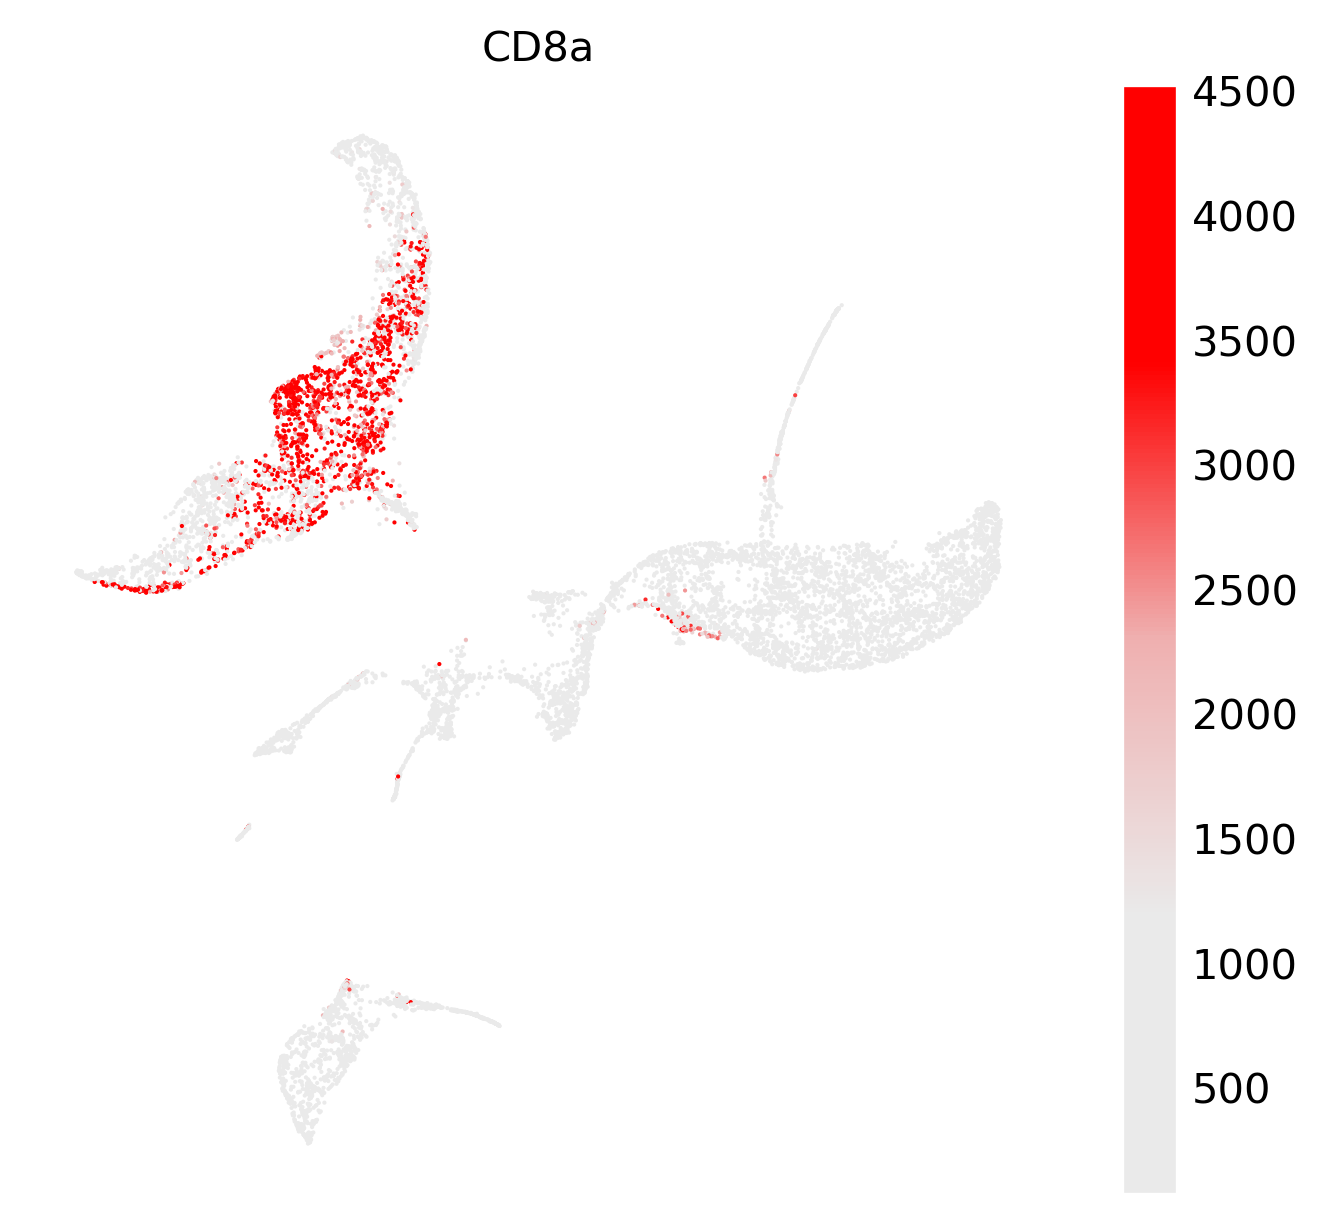

In [22]:
adata.obs['CD8a'] = protein[:, 'CD8a'].X.toarray()
oci.pl.scatter(adata, x_key='X_umap', color_key='CD8a', cmap=cmap, marker_size=1, fontsize=10)

Marker analysis gives a much better look at the structure of the data. It provides an interesting understanding of what multimodal weights learned. Chromatin accessibility weights are most dominant around progenitor cells, while protein weights are active for B cells, T cells, and monocytes.

## Correspondence between topics and multimodal weights

From marker analysis, you know which cell types have more active chromatin accessibility or protein levels. Now, we shall explore the relationship between LDA's topics and multimodal weights.

### Chromatin accessibility

Plot ATAC-seq topic activity.

(<Figure size 1920x1440 with 31 Axes>,
 array([[<AxesSubplot:title={'center':'0'}>,
         <AxesSubplot:title={'center':'1'}>,
         <AxesSubplot:title={'center':'2'}>,
         <AxesSubplot:title={'center':'3'}>],
        [<AxesSubplot:title={'center':'4'}>,
         <AxesSubplot:title={'center':'5'}>,
         <AxesSubplot:title={'center':'6'}>,
         <AxesSubplot:title={'center':'7'}>],
        [<AxesSubplot:title={'center':'8'}>,
         <AxesSubplot:title={'center':'9'}>,
         <AxesSubplot:title={'center':'10'}>,
         <AxesSubplot:title={'center':'11'}>],
        [<AxesSubplot:title={'center':'12'}>,
         <AxesSubplot:title={'center':'13'}>,
         <AxesSubplot:title={'center':'14'}>, <AxesSubplot:>]],
       dtype=object))

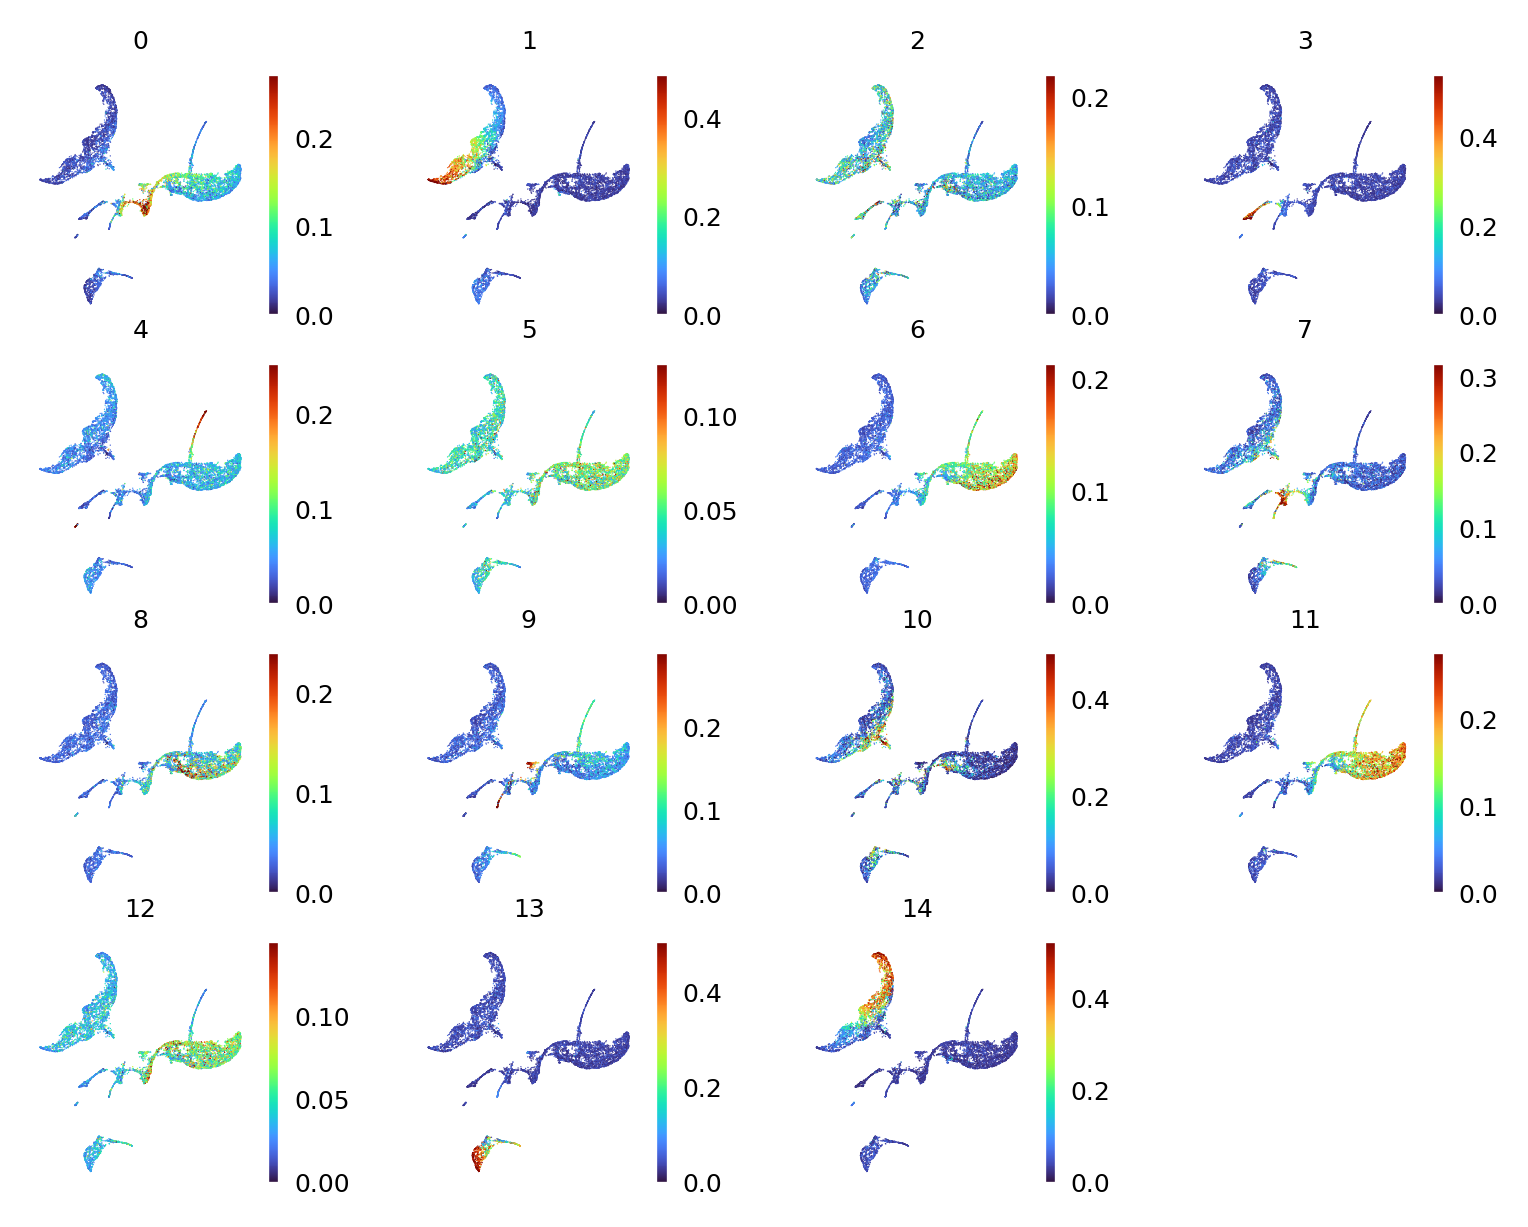

In [23]:
oci.pl.scatter(adata, x_key='X_umap', color_key='chromatin', cmap='turbo', marker_size=0.1, vmin=0)

Topic activity provides information about regions for which LDA found cohesive structures among features. But how do these regions relate to multimodal weights? We explore it by multiplying topic activity by modality's weights.

(<Figure size 1920x1440 with 31 Axes>,
 array([[<AxesSubplot:title={'center':'0'}>,
         <AxesSubplot:title={'center':'1'}>,
         <AxesSubplot:title={'center':'2'}>,
         <AxesSubplot:title={'center':'3'}>],
        [<AxesSubplot:title={'center':'4'}>,
         <AxesSubplot:title={'center':'5'}>,
         <AxesSubplot:title={'center':'6'}>,
         <AxesSubplot:title={'center':'7'}>],
        [<AxesSubplot:title={'center':'8'}>,
         <AxesSubplot:title={'center':'9'}>,
         <AxesSubplot:title={'center':'10'}>,
         <AxesSubplot:title={'center':'11'}>],
        [<AxesSubplot:title={'center':'12'}>,
         <AxesSubplot:title={'center':'13'}>,
         <AxesSubplot:title={'center':'14'}>, <AxesSubplot:>]],
       dtype=object))

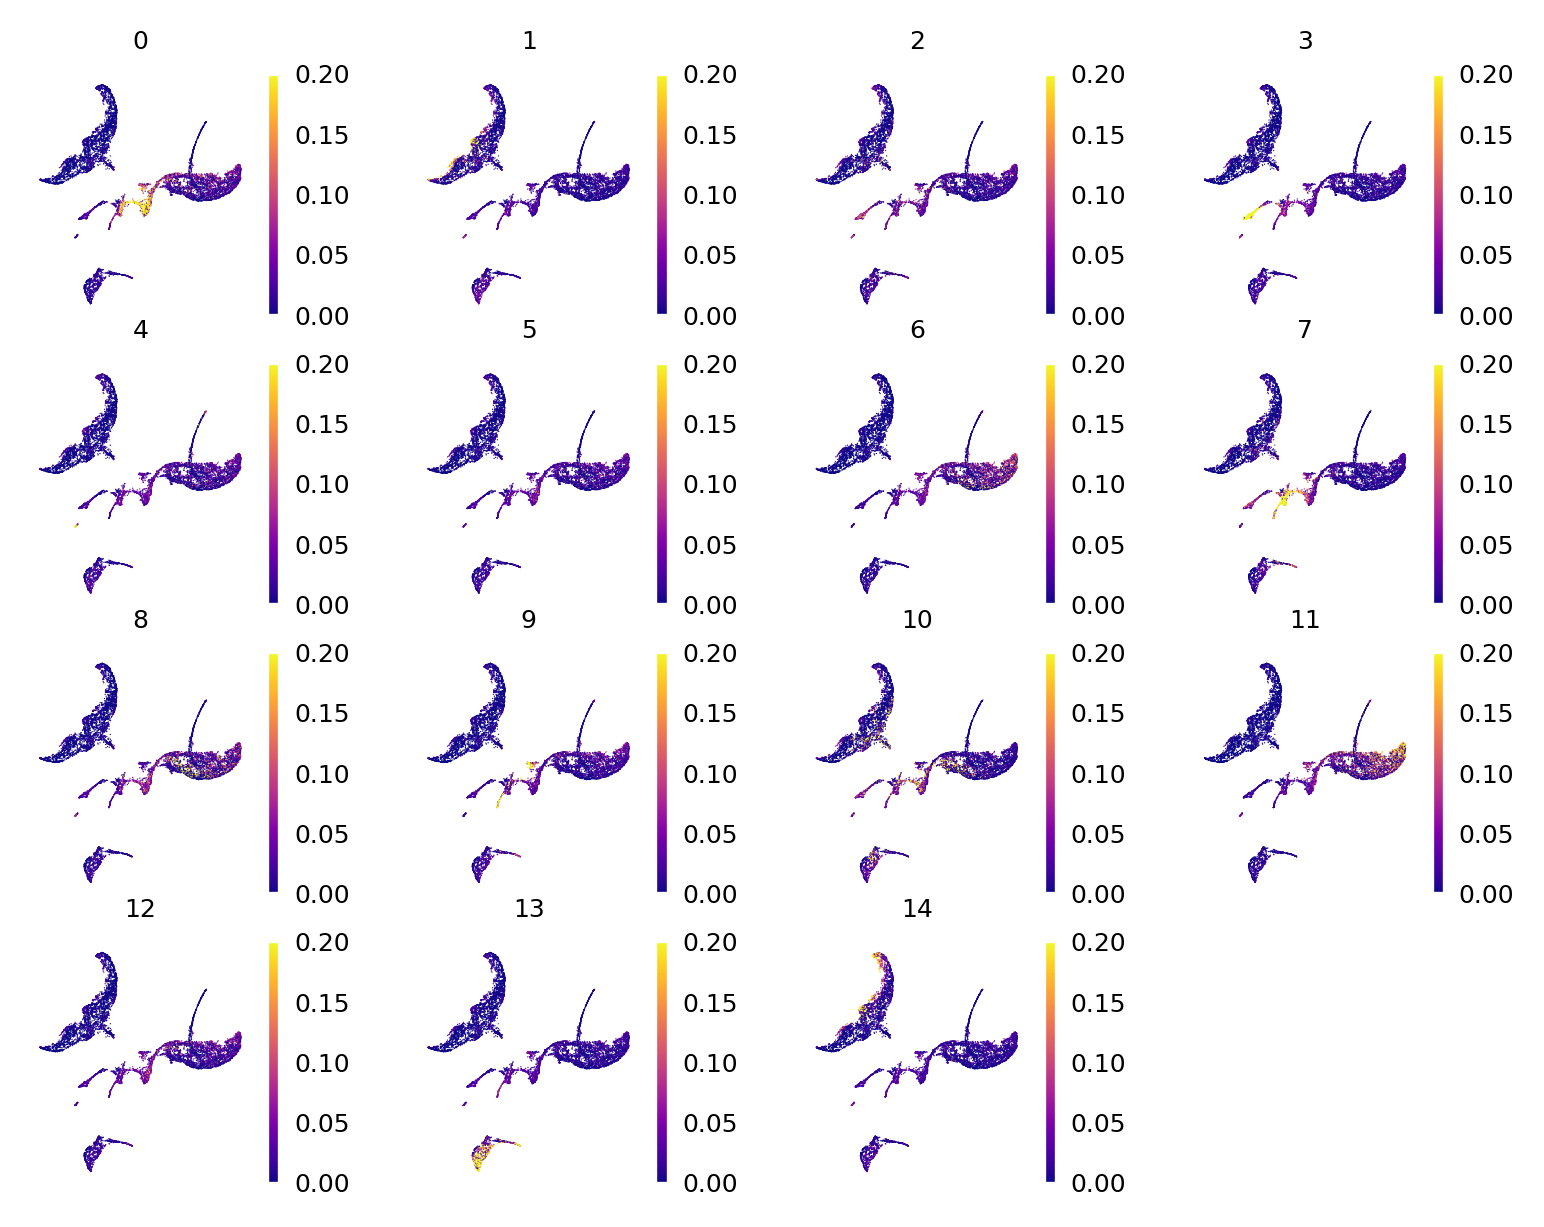

In [24]:
adata.obsm['topics_weights_chromatin'] = adata.obsm['chromatin'] * np.expand_dims(adata.obsm['weights']['chromatin'], 1)

oci.pl.scatter(adata, x_key='X_umap', color_key='topics_weights_chromatin', cmap='plasma', marker_size=0.1, vmin=0, vmax=0.2)

Topics 0, 3, 7, and 9 show the highest weighted topic activity. These are topics corresponding to, i.e., progenitors.

### Protein levels

Analogically, plot topics of protein levels.

(<Figure size 1920x1440 with 31 Axes>,
 array([[<AxesSubplot:title={'center':'0'}>,
         <AxesSubplot:title={'center':'1'}>,
         <AxesSubplot:title={'center':'2'}>,
         <AxesSubplot:title={'center':'3'}>],
        [<AxesSubplot:title={'center':'4'}>,
         <AxesSubplot:title={'center':'5'}>,
         <AxesSubplot:title={'center':'6'}>,
         <AxesSubplot:title={'center':'7'}>],
        [<AxesSubplot:title={'center':'8'}>,
         <AxesSubplot:title={'center':'9'}>,
         <AxesSubplot:title={'center':'10'}>,
         <AxesSubplot:title={'center':'11'}>],
        [<AxesSubplot:title={'center':'12'}>,
         <AxesSubplot:title={'center':'13'}>,
         <AxesSubplot:title={'center':'14'}>, <AxesSubplot:>]],
       dtype=object))

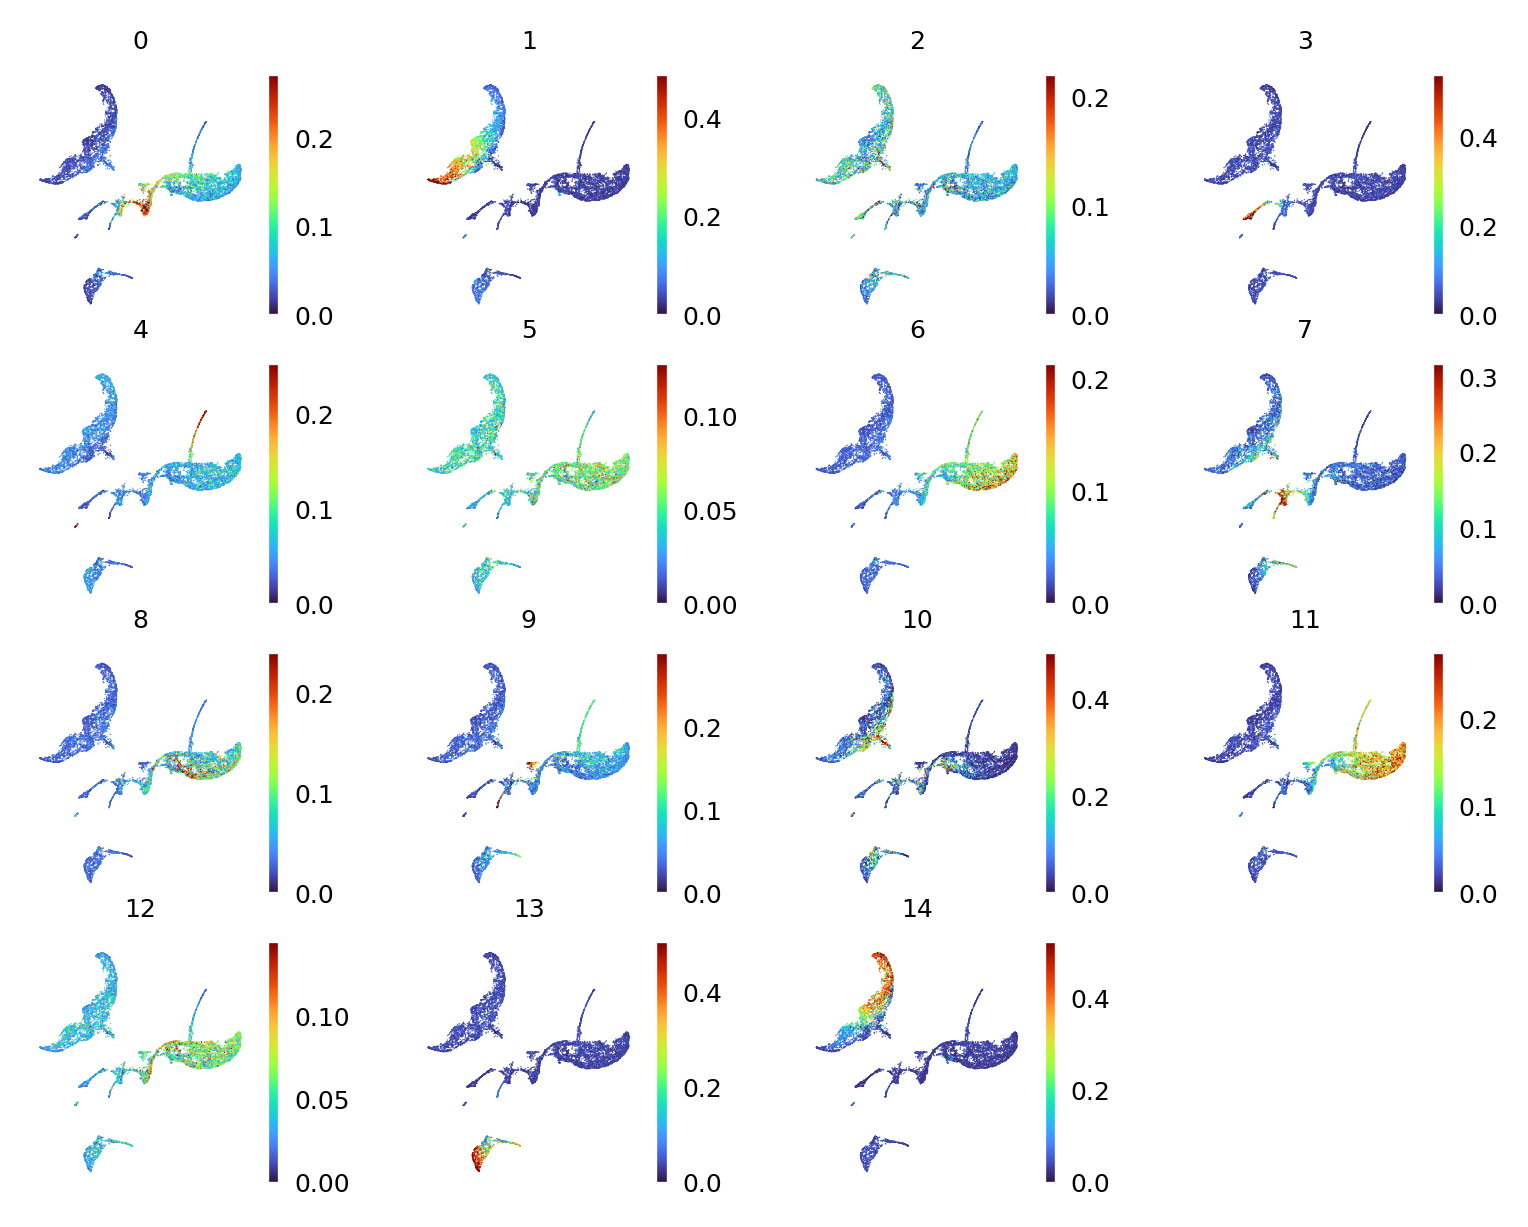

In [25]:
oci.pl.scatter(adata, x_key='X_umap', color_key='chromatin', cmap='turbo', marker_size=0.1, vmin=0)

Lastly, plot weighted topic activity.

(<Figure size 1920x1440 with 31 Axes>,
 array([[<AxesSubplot:title={'center':'0'}>,
         <AxesSubplot:title={'center':'1'}>,
         <AxesSubplot:title={'center':'2'}>,
         <AxesSubplot:title={'center':'3'}>],
        [<AxesSubplot:title={'center':'4'}>,
         <AxesSubplot:title={'center':'5'}>,
         <AxesSubplot:title={'center':'6'}>,
         <AxesSubplot:title={'center':'7'}>],
        [<AxesSubplot:title={'center':'8'}>,
         <AxesSubplot:title={'center':'9'}>,
         <AxesSubplot:title={'center':'10'}>,
         <AxesSubplot:title={'center':'11'}>],
        [<AxesSubplot:title={'center':'12'}>,
         <AxesSubplot:title={'center':'13'}>,
         <AxesSubplot:title={'center':'14'}>, <AxesSubplot:>]],
       dtype=object))

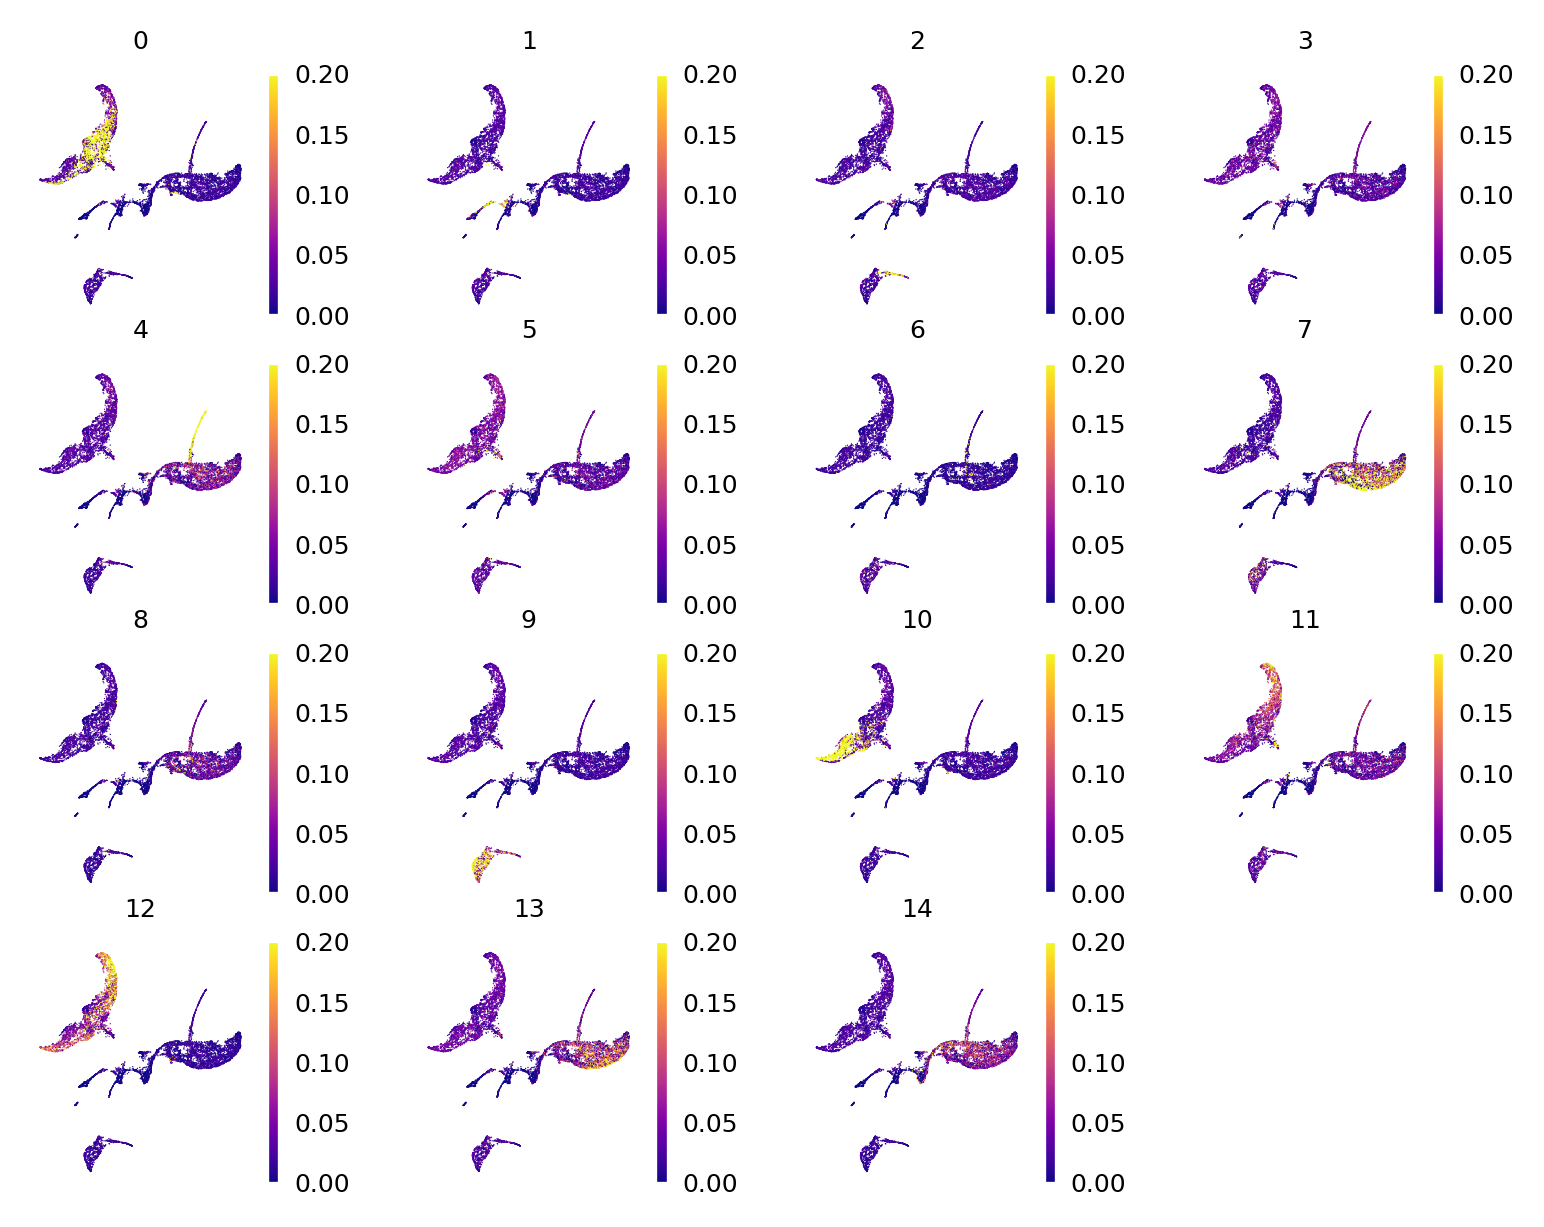

In [26]:
adata.obsm['topics_weights_protein'] = adata.obsm['protein'] * np.expand_dims(adata.obsm['weights']['protein'], 1)

oci.pl.scatter(adata, x_key='X_umap', color_key='topics_weights_protein', cmap='plasma', marker_size=0.1, vmin=0, vmax=0.2)

The highest-scoring topics relate to T cells, B cells, and monocytes.